In [60]:
import pandas as pd
import numpy as np
import torch
import time

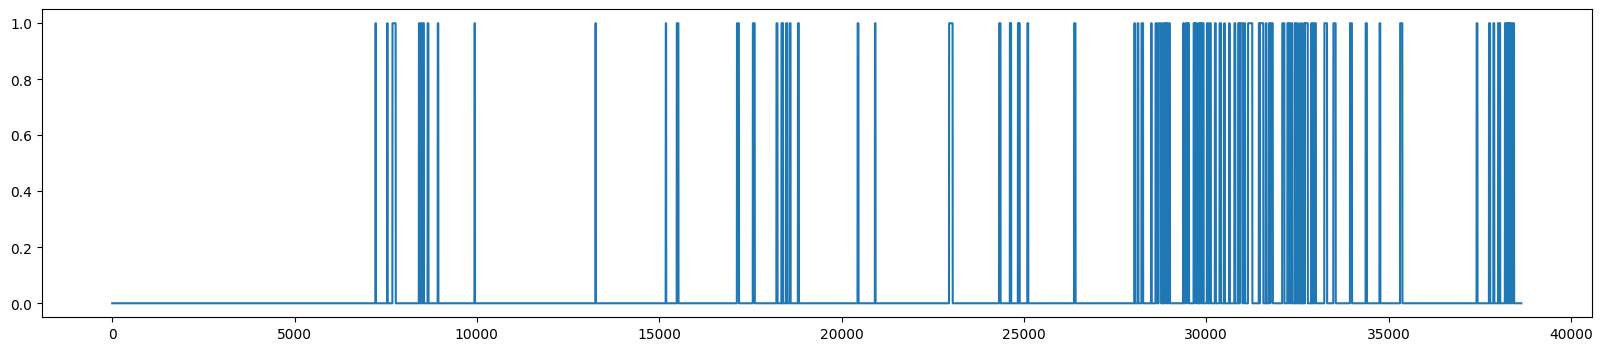

In [20]:
data = pd.read_csv('../wearsed/training/attention_unet/output/attention_none/f-0/test_preds_epoch_20.csv')['targets'].astype(int)
first = data[:data[data == -999].index[0]]
first.plot(figsize=(20, 4))
data = data.drop(data[data == -999].index)
data = data.reset_index(drop=True)

In [25]:
def to_event_list_old(event_or_not):
    last = 0
    events = []
    current_event = {}
    for i, current in enumerate(event_or_not):
        if current == last:
            continue

        if current > last:  # Beginning of a new event
            current_event['start'] = i
            last = current
            continue

        if current < last:  # End of the new event
            current_event['end'] = i
            last = current
            events.append(current_event)
            current_event = {}
            continue
    return events

In [27]:
start_time = time.time()
to_event_list_old(data)
print(time.time() - start_time)

1.885124921798706


In [99]:
def to_event_list_new(event_or_not):
    events = torch.tensor(event_or_not[event_or_not == 1].index.values)
    events_shift = torch.concat([torch.tensor([0]), events[:-1]])
    diff = events - events_shift

    starts = diff != 1
    ends = torch.concat([(diff != 1)[1:], torch.tensor([True])])
    
    event_list = [{'start': int(start), 'end': int(end)} for start, end in zip(events[starts], events[ends])]
    return event_list

In [103]:
test = pd.Series([0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1])
#                 0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
#                           5-----8                    19----22      26        31----34
to_event_list_new(test)

[{'start': 5, 'end': 8},
 {'start': 19, 'end': 22},
 {'start': 26, 'end': 26},
 {'start': 31, 'end': 34}]

In [101]:
start_time = time.time()
to_event_list_new(data)
print(time.time() - start_time)

0.75722336769104


In [104]:
test = pd.Series([0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1])
#                 0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4
#                           5-----8                    19----22      26        31----34
to_event_list_old(test)

[{'start': 5, 'end': 9}, {'start': 19, 'end': 23}, {'start': 26, 'end': 27}]